In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import h5py
from scipy.stats import entropy
from collections import Counter
from activ import load_data
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages

In [3]:
fulldata = pd.read_csv('/Users/ahyeon/Desktop/TBIanalysis/data/preprocessed_data_matrix.csv', encoding = "ISO-8859-1")
fulldata.shape

(586, 919)

In [4]:
subdata = load_data()
nmfdata = load_data(uoinmf=True)
sub_oc_features = subdata.outcome_features
sub_bm_features = subdata.biomarker_features
oc_bases = nmfdata.outcome_bases
sub_oc = subdata.outcomes
sub_bm = subdata.biomarkers

In [5]:
for ii,c in enumerate(fulldata.columns):
    if 'Gcs' in c or 'GCS' in c:
        print(ii,c)

133 GcsPreHospScoreTimeSinceInj
134 GcsPreHospScore
156 GcsEDArrScoreTimeSinceInj
157 GcsEDArrAssmtCond
158 admGCSeyes
159 admGCSeyes.t
160 admGCSverb
161 admGCSverb.t
162 admGCSmotor
163 admGCSmotor.t
164 GcsEDArrScore
165 admGCSuntest
166 admGCS
167 GCSMildModSevereRaw
168 GCSMildModSevereRecode
169 GcsEDArrPupils
170 GcsEDPupilSizeR
171 GcsEDArrPupilReactR
172 GcsEDPupilSizeL
173 GcsEDArrPupilReactL
181 GcsEDDischEyes
182 GcsEDDischVerbal
183 GcsEDDischMotor
184 GcsEDDischPupils
185 GcsEDDischScore
186 GcsEDDischScoreTimeSinceInj
187 GcsEDDischAssmtCond
749 GranulocyteColonyStimulatingFactorGCSFpgml


In [10]:
for ii,c in enumerate(sub_bm_features):
    if 'Gcs' in c or 'GCS' in c:
        print(ii,c)

106 admGCSeyes
107 admGCSeyes.t
108 admGCSverb
109 admGCSverb.t
110 admGCSmotor
111 admGCSmotor.t
112 admGCSuntest
113 admGCS
114 GCSMildModSevereRecode


In [12]:
subdata

In [13]:
sub_bm[:,106]

array([4., 4., 4., 4., 4., 4., 4., 4., 1., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 1., 4., 4., 4., 1., 4., 4., 4., 4., 1., 1., 4., 4., 4., 4., 1.,
       4., 4., 4., 4., 4., 4., 4., 1., 0., 4., 4., 1., 4., 1., 1., 4., 4.,
       1., 4., 4., 4., 4., 4., 4., 4., 4., 4., 0., 4., 1., 0., 1., 4., 4.,
       1., 1., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 2., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 3., 2., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 2.,
       0., 4., 4., 4., 4., 2., 4., 4., 4., 4., 4., 4., 4., 2., 1., 4., 1.,
       4., 4., 4., 4., 4., 4., 4., 4., 2., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 1., 4., 4., 4., 4., 4., 1.,
       4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 3., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 1., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 3., 4.

5
5
5


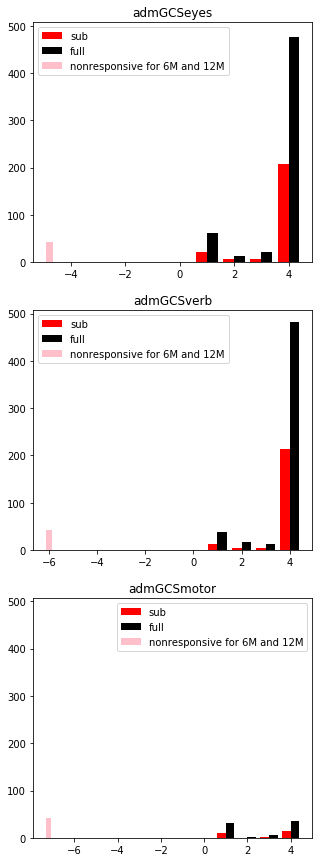

In [8]:
sub = [106,108,110]
full = [158,160,162]

names = ['admGCSeyes', 'admGCSverb', 'admGCSmotor', 'admGCSuntest', 'admGCS', 'GCSMildModSevereRecode']

fig, ax = plt.subplots(3,1,sharey=True,figsize=(5,15))
ax = ax.flatten()
count=0

for x, y, name in zip(sub, full, names):
    sub = sub_bm[:,x]
    full = fulldata.iloc[:,y]
    dat = sub
    dat2 = full
    
    num_na2 = dat2.isna().sum()
    print(num_na2)
    nonresponsive = 29+13
#     nonresponsive2 = 13

    dat2_dropna = dat2.dropna()
    counts, bins, bars = ax[count].hist([sub, dat2_dropna], align='left', label=['sub','full'], 
                     color=['red','black'], bins=np.arange(1,6))
    length = (bins[1]-bins[0])/4
    
    mx = max(dat2_dropna)
    na_index = -mx*(1+1/5) 
    na_index2 = -mx*(1+2/5)
        
    ax[count].bar(na_index, nonresponsive, color='pink', label='nonresponsive for 6M and 12M', width=length)
    ax[count].legend()
    
    ax[count].set_title('{}'.format(name))
    ax[count].legend()
    count += 1
plt.savefig('/Users/ahyeon/Desktop/activ misc/gcs2.pdf')